In [23]:
import os 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../plots/'

from desilike.samples import Profiles, Chain, plotting
from emulator_fit import get_power_likelihood, get_corr_likelihood

tracer = 'ELG'
region = 'SGC'
stat = 'corr'
rp_cut = 0
theory_name = 'dampedbao'

In [24]:
emulator_dir = '/global/cfs/cdirs/desi/users/mpinon/bao/emulators/emulators_shapefit_{}'.format(tracer)
profiles_dir = '/global/cfs/cdirs/desi/users/mpinon/bao/profiles/profiles_shapefit_{}_{{}}{}'.format(tracer, region)
chains_dir = '/global/cfs/cdirs/desi/users/mpinon/bao/chains/chains_shapefit_{}_{{}}{}'.format(tracer, region)

In [25]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12

<Figure size 600x600 with 0 Axes>

Removed no burn in
Removed no burn in


/tmp/ipykernel_1536598/2696092141.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, 'corner_plot_{}_{}_{}_{}_th{:.1f}.png'.format(tracer, region, stat, theory_name, rp_cut)), dpi=300)
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20230712-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


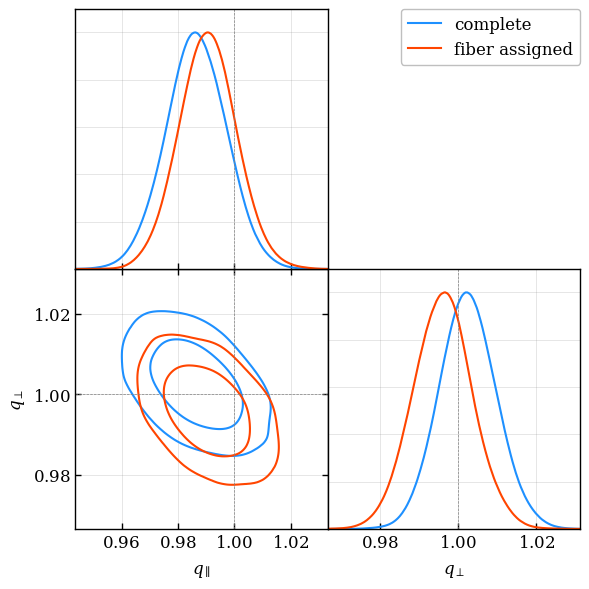

In [26]:
if stat=='power':
    chain_complete = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'power_xinmax0.35_{}_{:d}.npy'.format(theory_name, i))).remove_burnin(0.5)[::10] for i in range(8)])
    chain = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(''), 'power_xinmax0.35_{}_{:d}.npy'.format(theory_name, i))).remove_burnin(0.5)[::10] for i in range(8)])
    #chain_complete_rp_cut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'power_xinmax0.35_{}_th{:.1f}_{:d}.npy'.format(theory_name, rp_cut, i))).remove_burnin(0.5)[::10] for i in range(8)])
    #chain_rp_cut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(''), 'power_xinmax0.35_{}_th{:.1f}_{:d}.npy'.format(theory_name, rp_cut, i))).remove_burnin(0.5)[::10] for i in range(8)])
if stat=='corr':
    chain_complete = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'corr_{}_{:d}.npy'.format(theory_name, i))).remove_burnin(0.5)[::10] for i in range(8)])
    chain = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(''), 'corr_{}_{:d}.npy'.format(theory_name, i))).remove_burnin(0.5)[::10] for i in range(8)])
    #chain_complete_rp_cut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'corr_{}_fc_th{:.1f}_{:d}.npy'.format(theory_name, rp_cut, i))).remove_burnin(0.5)[::10] for i in range(8)])
    #chain_rp_cut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(''), 'corr_{}_fc_th{:.1f}_{:d}.npy'.format(theory_name, rp_cut, i))).remove_burnin(0.5)[::10] for i in range(8)])

markers = {'qpar': 1., 'qper': 1.}
colors = ['dodgerblue', 'orangered']
plotting.plot_triangle([chain_complete, chain], labels=['complete', 'fiber assigned'], 
                       params=['qpar', 'qper'], markers=markers, 
                       g=g, lws=1.5, contour_lws=1.5, filled=False, colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, 'corner_plot_{}_{}_{}_{}_th{:.1f}.png'.format(tracer, region, stat, theory_name, rp_cut)), dpi=300)
plt.show()